# Intro to Jax

In [1]:
from jax import grad

In [2]:
def f(x):
  return x**2

In [3]:
f(3)

9

In [4]:
grad_f = grad(f)

In [5]:
f(3.), grad_f(3.)

(9.0, DeviceArray(6., dtype=float32))

In [6]:
def f(x, y):
  return y * x**2

grad_f = grad(f, argnums=(0, 1))

dx,dy = grad_f(1., 2.)

dx,dy

(DeviceArray(4., dtype=float32), DeviceArray(1., dtype=float32))

# Arrays

In [7]:
import jax.numpy as np
from jax import hessian

def f(x):
    return np.sum(x**2)

grad_f = grad(f)
hess_f = hessian(f)

dx = grad_f(np.array([1., 2.]))
hx = hess_f(np.array([1., 2.]))
dx,hx

(DeviceArray([2., 4.], dtype=float32), DeviceArray([[2., 0.],
              [0., 2.]], dtype=float32))

# Speed

In [8]:
def g(x):
    return np.sum(x**2)

grad_g = grad(g)


In [9]:
%time _ = np.stack([grad_g(i) for i in np.linspace(0, 10, 1000)])


CPU times: user 3.39 s, sys: 595 ms, total: 3.98 s
Wall time: 3.63 s


In [10]:
from jax import jit

def g(x):
    return np.sum(x**2)

grad_g = jit(grad(g))


In [11]:
%time _ = np.stack([grad_g(i) for i in np.linspace(0, 10, 1000)])


CPU times: user 388 ms, sys: 132 ms, total: 520 ms
Wall time: 433 ms


In [12]:
from jax import vmap

def g(x):
    return np.sum(x**2)

grad_g = jit(grad(g))


In [13]:
%time _ = vmap(grad_g)(np.linspace(0, 10, 1000))


CPU times: user 20.7 ms, sys: 445 µs, total: 21.2 ms
Wall time: 72.3 ms


# Full Train Loop

In [14]:
def predict(params, inputs):
    return inputs @ params

def mse(params, inputs, targets):
    preds = predict(params, inputs)
    return np.mean((preds - targets)**2)

grad_fun = jit(grad(mse))


In [15]:
import tqdm
from numpy import zeros
from numpy.random import normal

# we generate 10_000 rows and 5 columns
n, k = 10_000, 5
X = np.concatenate([np.ones((n, 1)), normal(0, 1, (n, k))], axis=1)

# these are the true coefficients that we have to learn
true_w = normal(0, 5, (k + 1,))
# this is the generated dataset used in training
y = X @ true_w
W = normal(0, 1, (k + 1,))

stepsize = 0.02
n_step = 100
hist_gd = zeros((n_step,))
for i in tqdm.tqdm(range(n_step)):
    # we calculate the gradient
    dW = grad_fun(W, inputs=X, targets=y)
    # we apply the gradient
    W -= dW*stepsize
    # we keep track of the loss over time
    hist_gd[i] = mse(W, inputs=X, targets=y)


100%|██████████| 100/100 [00:00<00:00, 164.64it/s]


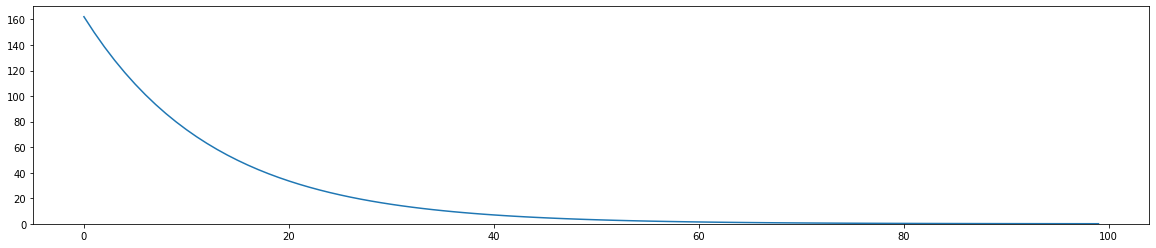

In [16]:
import matplotlib.pylab as plt

plt.figure(figsize=(20, 4))
plt.plot(hist_gd)
plt.ylim(0);
